In [1]:
#initialization
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [7]:
s = '01'

In [16]:
# Creating registers
# qubits and classical bits for querying the oracle and finding the hidden period s
n = 2*len(str(s))
simonCircuit = QuantumCircuit(n)
barriers = True

# Apply Hadamard gates before querying the oracle
simonCircuit.h(range(len(str(s))))    
    
# Apply barrier 
if barriers:
    simonCircuit.barrier()

# Apply the query function
## 2-qubit oracle for s = 11
simonCircuit.cx(0, len(str(s)) + 0)
simonCircuit.cx(0, len(str(s)) + 1)
# simonCircuit.cx(1, len(str(s)) + 0)
# simonCircuit.cx(1, len(str(s)) + 1)  

# Apply barrier 
if barriers:
    simonCircuit.barrier()

# Apply Hadamard gates to the input register
simonCircuit.h(range(len(str(s))))

# Measure ancilla qubits
simonCircuit.measure_all()

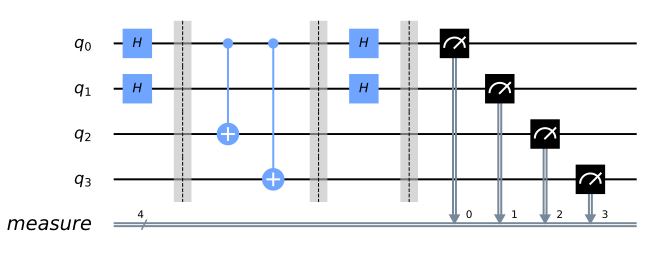

In [17]:
simonCircuit.draw(output='mpl')

{'00': 520, '01': 504}


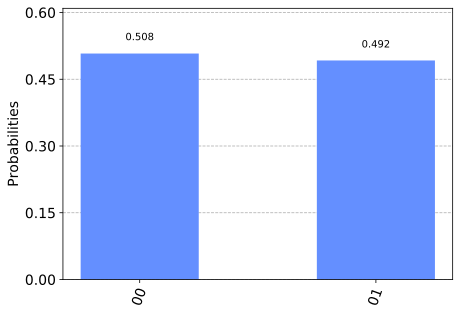

In [18]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(simonCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()

# Categorize measurements by input register values
answer_plot = {}
for measresult in answer.keys():
    measresult_input = measresult[len(str(s)):]
    if measresult_input in answer_plot:
        answer_plot[measresult_input] += answer[measresult]
    else:
        answer_plot[measresult_input] = answer[measresult] 

# Plot the categorized results
print( answer_plot )
plot_histogram(answer_plot)

In [19]:
# Calculate the dot product of the results
def sdotz(a, b):
    accum = 0
    for i in range(len(a)):
        accum += int(a[i]) * int(b[i])
    return (accum % 2)

print('s, z, s.z (mod 2)')
for z_rev in answer_plot:
    z = z_rev[::-1]
    print( '{}, {}, {}.{}={}'.format(s, z, s,z,sdotz(s,z)) )

s, z, s.z (mod 2)
01, 00, 01.00=0
01, 10, 01.10=0
